In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://github.com/harshal-96/Data/raw/main/bestsellers%20with%20categories.csv")

In [3]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [4]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


1. How many records are in the dataset?

In [7]:
print("The number of records in the dataset are ",df.shape[0])

The number of records in the dataset are  550


2. What is the distribution of book genres?

In [13]:
print("The distribution of book genres are as follows ", df.Genre.value_counts())

The distribution of book genres are as follows  Non Fiction    310
Fiction        240
Name: Genre, dtype: int64


In [ ]:
Who are the top 5 authors with the most books in the dataset?

3. Who are the top 5 authors with the most books in the dataset?

In [21]:
df['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

In [24]:
unique_df=df.drop_duplicates(subset='Name')

In [26]:
top_authors = unique_df['Author'].value_counts().head(5)
print(top_authors)

Jeff Kinney        12
Rick Riordan       10
Stephenie Meyer     7
Bill O'Reilly       6
Dav Pilkey          6
Name: Author, dtype: int64


4. What is the average rating of the books in the dataset?

In [ ]:
round(df['User Rating'].mean(),2)

4.62

5. What is the average price of the books ?

In [ ]:
round(df['Price'].mean(),2)

13.1

6. What is the range of years in which the books were published?

In [27]:
df['Year'].min(),df['Year'].max()

(2009, 2019)

In [29]:
print("The range of years in which books were published is from ",df['Year'].min()," to ",df['Year'].max())

The range of years in which books were published is from  2009  to  2019


7. What are the top 5 most reviewed books?

In [43]:
df.iloc[unique_df['Reviews'].nlargest(5).index]


,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction


8. What is the distribution of book ratings?

<Axes: xlabel='User Rating', ylabel='count'>

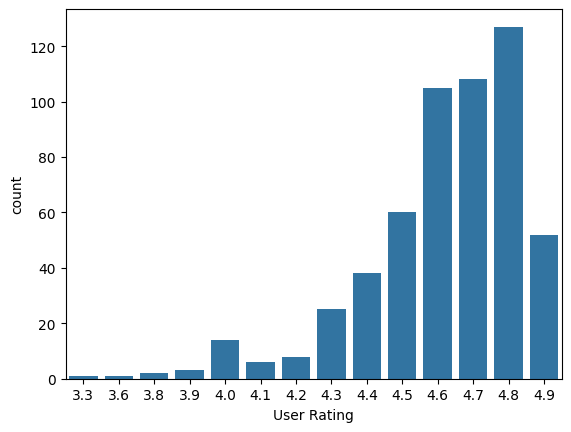

In [ ]:
sns.countplot(data=df,x='User Rating')

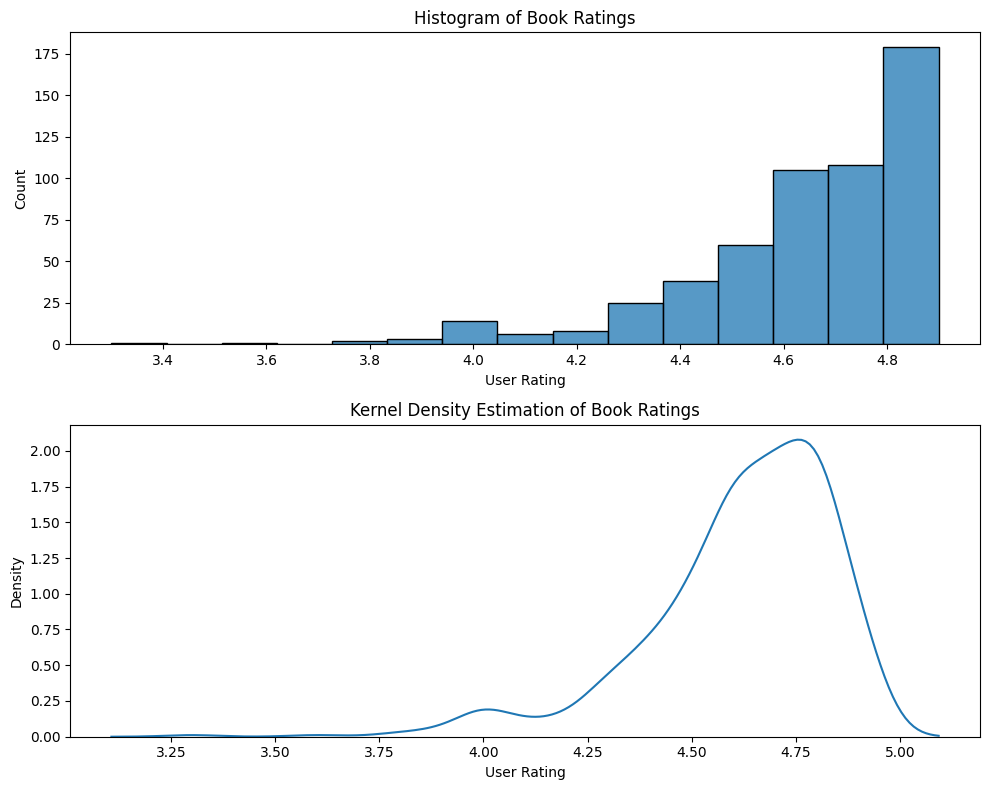

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(data=df, x='User Rating', bins=15, ax=axes[0])
axes[0].set_title('Histogram of Book Ratings')

sns.kdeplot(data=df, x='User Rating', ax=axes[1])
axes[1].set_title('Kernel Density Estimation of Book Ratings')

plt.tight_layout()
plt.show()

9. How many books have a rating greater than 4.5?

In [85]:
print("The number of books having a rating greater than 4.5 are", df[df['User Rating'] > 4.5].shape[0])

The number of books having a rating greater than 4.5 are 392


10. What is the most common price range for books?

In [82]:
price_ranges = [(0, 10), (10, 20), (20, 30),(30,40),(40,50),(50,60)]

price_counts = pd.cut(df['Price'], bins=[0, 10, 20, 30,40,50,60], include_lowest=True).value_counts()

most_common_range = price_counts.idxmax()

print("Most common price range for books:")
print(most_common_range)

Most common price range for books:
(-0.001, 10.0]


<Axes: ylabel='Price'>

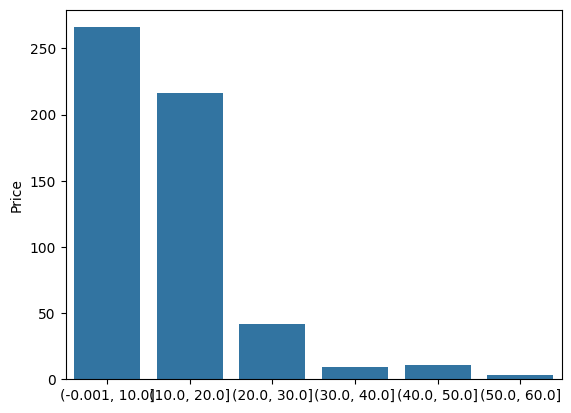

In [83]:
sns.barplot(price_counts)

11. What is the average number of reviews for books in each genre?

In [79]:
a=df.groupby('Genre')['Reviews'].mean().round(2)['Non Fiction']

In [80]:
b=df.groupby('Genre')['Reviews'].mean().round(2)['Fiction']

In [81]:
print("The average number of reviews for non fiction is ",a," and for fiction is ",b)

The average number of reviews for non fiction is  9065.15  and for fiction is  15683.79


12. What is the relationship between the number of reviews and the rating of books?

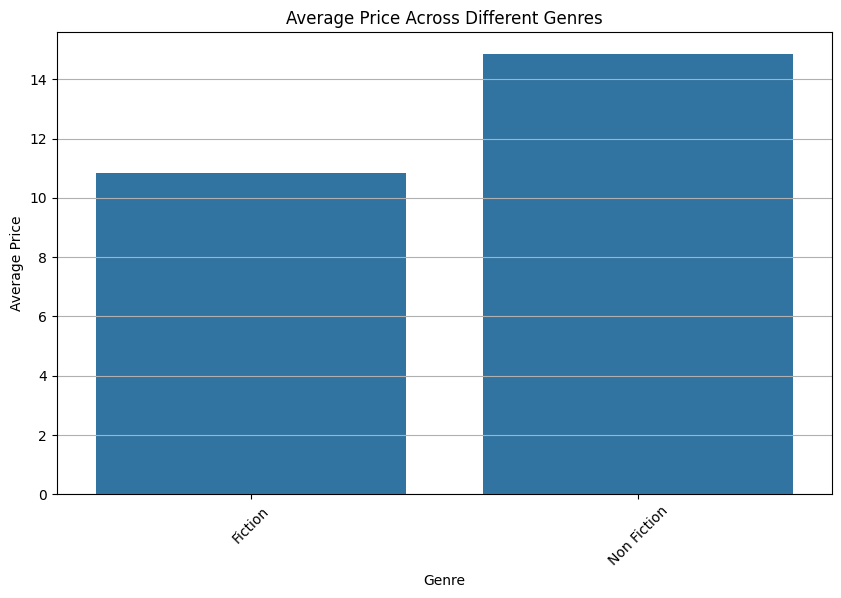

In [78]:
average_price_by_genre = df.groupby('Genre')['Price'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_genre, x='Genre', y='Price')
plt.title('Average Price Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


13. What is the relationship between the number of reviews and the rating of books?

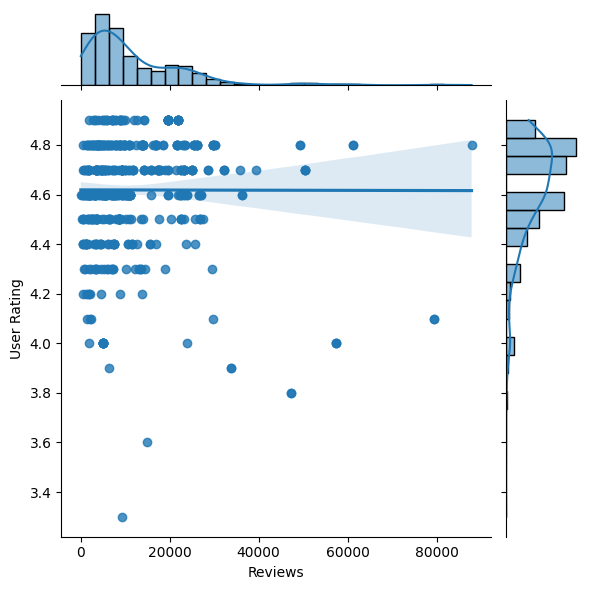

In [75]:
sns.jointplot(data=df, x='Reviews', y='User Rating',kind='reg')

In [76]:
print("No relation between reviews and prices since the relation is neutral")

No relation between reviews and prices since the relation is neutral


14. What are the top 5 books with the highest ratings and the highest number of reviews?

In [73]:
top_books = df.sort_values(by=['User Rating', 'Reviews'], ascending=[False, False])

top_5_books_unique = top_books.drop_duplicates(subset=['Name']).head(5)

print("Top 5 unique books with the highest ratings and the highest number of reviews:")
top_5_books_unique[['Name', 'Author', 'User Rating', 'Reviews']]



Top 5 unique books with the highest ratings and the highest number of reviews:


,Name,Author,User Rating,Reviews
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344


In [68]:
unique_df.groupby(['Name','Author']).agg({'Reviews':'sum','User Rating':'max'}).sort_values(by=['User Rating', 'Reviews'], ascending=[False, False]).head(5)

,,Reviews,User Rating
Name,Author,,
"Oh, the Places You'll Go!",Dr. Seuss,21834,4.9
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",J.K. Rowling,19622,4.9
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),Sarah Young,19576,4.9
The Very Hungry Caterpillar,Eric Carle,19546,4.9
"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,14344,4.9


15. How has the number of bestseller books published per year changed over time?

In [ ]:

rating_threshold = 4.5

reviews_threshold = 10000

bestsellers_df = unique_df[(unique_df['User Rating'] >= rating_threshold) & (unique_df['Reviews'] >= reviews_threshold)]


bestsellers_df['Publication Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

bestsellers_per_year = bestsellers_df.groupby('Year').size()

bestsellers_per_year

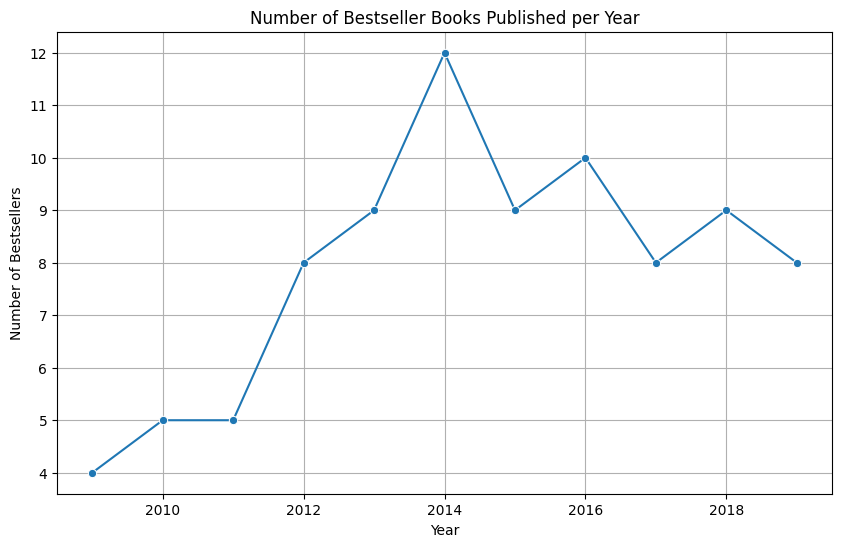

In [64]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=bestsellers_per_year, marker='o')
plt.title('Number of Bestseller Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bestsellers')
plt.grid(True)
plt.show()